### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
from wordcloud import WordCloud

### Reading Cocktails Recipes Data

In [2]:
cocktails=pd.read_csv(r"C:\Users\Vaishali\Desktop\Vaishu\ISB\Term 3\CT\Assignment\hotaling_cocktails_Cocktails.csv", encoding='latin-1')


### Cocktails dataset

In [3]:
cocktails.columns

Index(['Cocktail Name', 'Bartender', 'Bar/Company', 'Location', 'Ingredients',
       'Garnish', 'Glassware', 'Preparation', 'Notes'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', cocktails.shape[0])
cocktails.head(10)

Cocktail Name          Bartender  \
0                        Flor de Amaras     Kelly McCarthy   
1                       The Happy Place  Elizabeth Montana   
2                Bon Voyage Pisco Punch        Jon Morales   
3             Still Life of a Pineapple    Daniel Braganca   
4                   The Bittered Valley         Nik Virrey   
5                              OH Snap!     Kevin Diedrich   
6                    Wabash Avenue Sour   Phillip Ricafort   
7                              IPA Mule           Jon Ruiz   
8                         Ritz Cocktail       Dale DeGroff   
9  King's Snap the Chocolate Out of You         Ian Julian   

              Bar/Company       Location  \
0                     NaN         Boston   
1         Forgery & Verso  San Francisco   
2                     NaN  San Francisco   
3                 Backbar     Somerville   
4                     NaN        Seattle   
5  Pacific Cocktail Haven  San Francisco   
6            American Oak        Alameda   
7         AMK Kitchen Bar        Chicago   
8                     NaN            NaN   
9                     NaN    New Orleans   

                                         Ingredients  \
0  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   
5  1 oz Junipero Gin, 1 oz House-made Simple Syru...   
6  2 oz Bourbon, 1 oz Fresh Lemon Juice, .5 oz Lu...   
7  1.5 oz Hophead Vodka, .5 oz Ginger Liqueur, .7...   
8  .75 oz Cognac, .5 oz Cointreau, .25 oz Luxardo...   
9  1 oz King's Ginger Liqueur, 1.5 oz Homemade mi...   

                                     Garnish    Glassware  \
0                            Marigold Petals          NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary          NaN   
2                                        NaN   Punch Bowl   
3                                        NaN          NaN   
4                                        NaN          NaN   
5                                        NaN      Collins   
6                            Rhubarb Bitters        Coupe   
7                                       Mint      Tin Cup   
8                                Orange Peel      Martini   
9                       Ginger snap crumbles  Rocks Glass   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   
5  Add 6-8 sugar snap peas to cocktail shaker. Li...   
6  Add all ingredients and dry-shake (without ice...   
7  Add all ingredients except beer into shaker ti...   
8  Add all ingredients except the champagne to a ...   
9  Add all ingredients except the whip cream and ...   

                                              Notes  
0                                               NaN  
1  Junipero Gin 20th Anniversary Signature Cocktail  
2                                               NaN  
3                                               NaN  
4                                               NaN  
5  Junipero Gin 20th Anniversary Signature Cocktail  
6                                               NaN  
7                                               NaN  
8                                               NaN  
9                                               NaN

In [100]:
cocktails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cocktail Name  687 non-null    object
 1   Bartender      452 non-null    object
 2   Bar/Company    270 non-null    object
 3   Location       342 non-null    object
 4   Ingredients    687 non-null    object
 5   Garnish        523 non-null    object
 6   Glassware      485 non-null    object
 7   Preparation    642 non-null    object
 8   Notes          151 non-null    object
dtypes: object(9)
memory usage: 48.4+ KB


In [6]:
cocktails.describe()

Cocktail Name             Bartender  Bar/Company       Location  \
count            687                   452          270            342   
unique           684                   250          168             41   
top      Rita's Song  Francesco Lafranconi  Dirty Habit  San Francisco   
freq               2                    38           29            156   

                                              Ingredients         Garnish  \
count                                                 687             523   
unique                                                686             318   
top     1 oz No.3 London Dry Gin, 1 oz Tempus Fugit Al...  Luxardo Cherry   
freq                                                    2              32   

       Glassware                                        Preparation  \
count        485                                                642   
unique        66                                                630   
top        Coupe  Shake until very cold; double strain into a ch...   
freq         107                                                  3   

                                                    Notes  
count                                                 151  
unique                                                102  
top     Featured on Speed Rack 2015 SF Speed City Take...  
freq                                                   18

In [7]:
cocktails.isnull().sum()

Cocktail Name      0
Bartender        235
Bar/Company      417
Location         345
Ingredients        0
Garnish          164
Glassware        202
Preparation       45
Notes            536
dtype: int64

In [8]:
cocktails["Cocktail Name"].value_counts()

Rita's Song                   2
Martinez                      2
Negroni                       2
The French Connection         1
Eat, Drink and Be Cherry      1
                             ..
Blind Luck                    1
The Naughty & Nice            1
The King's Cranberry Sauce    1
Mexican Sazerac               1
Union Jack                    1
Name: Cocktail Name, Length: 684, dtype: int64

To make Cocktail names unique, we are making some manual changes

In [9]:
dup_cocktails = ["Rita's Song","Martinez","Negroni"]

cocktails[cocktails["Cocktail Name"].isin(dup_cocktails)]

Cocktail Name       Bartender  Bar/Company       Location  \
30       Martinez             NaN          NaN            NaN   
88    Rita's Song     Jim Romdall          NaN            NaN   
95        Negroni             NaN  Dirty Habit  San Francisco   
170      Martinez  Jeff Hollinger          NaN            NaN   
338       Negroni             NaN          NaN            NaN   
390   Rita's Song             NaN          NaN        Seattle   

                                           Ingredients       Garnish  \
30   1.5 oz Old Tom Gin, 1.5 oz Tempus Fugit Alessi...  Orange Twist   
88   2 oz Nikka Whisky Taketsuru Pure Malt 12 YO, ....           NaN   
95   1 oz No.3 London Dry Gin, 1 oz Campari, 1 oz M...  Orange Slice   
170  2 oz Old Tom Gin, .75 oz Tempus Fugit Alessio ...    Lemon Peel   
338  1 oz No.3 London Dry Gin, 1 oz Tempus Fugit Al...  Orange Twist   
390  2 oz Nikka Whisky Taketsuru Pure Malt 12 YO, ....           NaN   

               Glassware                                        Preparation  \
30                 Coupe  Add all ingredients to a shaker and fill with ...   
88   Old Fashioned Glass  Build in old fashioned glass, stir and serve o...   
95   Old Fashioned Glass  Build the cocktail in a mixing glass. Stir for...   
170       Cocktail Glass  Combine ingredients in an ice-filled mixing gl...   
338          Rocks Glass  Pour all ingredients into an ice-filled old-fa...   
390                  NaN  Serve in an old fashioned glass over a large i...   

                                                 Notes  
30                                                 NaN  
88                                                 NaN  
95                                                 NaN  
170                                                NaN  
338  For a slightly sweeter version, replace Luxard...  
390                                                NaN

In [10]:
drop_row_index = cocktails[(cocktails["Cocktail Name"]=="Rita's Song") & (cocktails["Location"]=="Seattle")].index

cocktails = cocktails.drop(drop_row_index)

In [11]:
cocktails.at[30,'Cocktail Name'] = 'Martinez Orange'
cocktails.at[170,'Cocktail Name'] = 'Martinez Lemon'

In [12]:
cocktails.at[95,'Cocktail Name'] = 'Negroni Old Fashioned'
cocktails.at[338,'Cocktail Name'] = 'Negroni Rocks'

In [13]:
cocktails.describe()

Cocktail Name             Bartender  Bar/Company       Location  \
count              686                   452          270            341   
unique             686                   250          168             41   
top     Flor de Amaras  Francesco Lafranconi  Dirty Habit  San Francisco   
freq                 1                    38           29            156   

                                              Ingredients         Garnish  \
count                                                 686             523   
unique                                                685             318   
top     1 oz No.3 London Dry Gin, 1 oz Tempus Fugit Al...  Luxardo Cherry   
freq                                                    2              32   

       Glassware                                        Preparation  \
count        485                                                641   
unique        66                                                629   
top        Coupe  Shake until very cold; double strain into a ch...   
freq         107                                                  3   

                                                    Notes  
count                                                 151  
unique                                                102  
top     Featured on Speed Rack 2015 SF Speed City Take...  
freq                                                   18

#### Impute Missing Data

In [14]:
# Backfill location and other attributes as much as possible

#Identifying rows with missing locations
rows_with_missing_location = cocktails[cocktails['Location'].isnull()]

In [15]:
# Comparing bartender and location
# Backfilling with location
for index, row in rows_with_missing_location.iterrows():
    bartender = row['Bartender']
    matching_row = cocktails[(cocktails['Bartender'] == bartender) & cocktails['Location'].notnull()]
    if not matching_row.empty:
        location = matching_row.iloc[0]['Location']
        # Update the missing location with the location from the matching row
        cocktails.at[index, 'Location'] = location

In [16]:
#Identifying rows with missing Bars
rows_with_missing_Bar = cocktails[cocktails['Bar/Company'].isnull()]

In [17]:
# Backfilling with bar/company
for index, row in rows_with_missing_Bar.iterrows():
    bartender = row['Bartender']
    matching_row = cocktails[(cocktails['Bartender'] == bartender) & cocktails['Bar/Company'].notnull()]
    if not matching_row.empty:
        Bar = matching_row.iloc[0]['Bar/Company']
        # Update the missing Bar/Company with the Bar/Company from the matching row
        cocktails.at[index, 'Bar/Company'] = Bar

In [18]:
rows_with_missing_location = cocktails[cocktails['Location'].isnull()]

In [19]:
# Backfilling location with bar/company
for index, row in rows_with_missing_location.iterrows():
    bar = row['Bar/Company']
    matching_row = cocktails[(cocktails['Bar/Company'] == bar) & cocktails['Location'].notnull()]
    if not matching_row.empty:
        location = matching_row.iloc[0]['Location']
        # Update the missing location with the location from the matching row
        cocktails.at[index, 'Location'] = location

In [20]:
cocktails.describe()

Cocktail Name             Bartender  Bar/Company       Location  \
count              686                   452          303            382   
unique             686                   250          168             41   
top     Flor de Amaras  Francesco Lafranconi  Dirty Habit  San Francisco   
freq                 1                    38           29            175   

                                              Ingredients         Garnish  \
count                                                 686             523   
unique                                                685             318   
top     1 oz No.3 London Dry Gin, 1 oz Tempus Fugit Al...  Luxardo Cherry   
freq                                                    2              32   

       Glassware                                        Preparation  \
count        485                                                641   
unique        66                                                629   
top        Coupe  Shake until very cold; double strain into a ch...   
freq         107                                                  3   

                                                    Notes  
count                                                 151  
unique                                                102  
top     Featured on Speed Rack 2015 SF Speed City Take...  
freq                                                   18

In [21]:
# Apply the function to the "Ingredients" column
cocktails["Ingredients_list"] = cocktails["Ingredients"].str.split(",")
cocktails["Ingredients_list"] = cocktails["Ingredients_list"].apply(lambda lst: [s.strip() for s in lst])

In [22]:
cocktails.head()

Cocktail Name          Bartender      Bar/Company  \
0             Flor de Amaras     Kelly McCarthy              NaN   
1            The Happy Place  Elizabeth Montana  Forgery & Verso   
2     Bon Voyage Pisco Punch        Jon Morales              NaN   
3  Still Life of a Pineapple    Daniel Braganca          Backbar   
4        The Bittered Valley         Nik Virrey              NaN   

        Location                                        Ingredients  \
0         Boston  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  San Francisco  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  San Francisco  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3     Somerville  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4        Seattle  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                     Garnish   Glassware  \
0                            Marigold Petals         NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary         NaN   
2                                        NaN  Punch Bowl   
3                                        NaN         NaN   
4                                        NaN         NaN   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   

                                              Notes  \
0                                               NaN   
1  Junipero Gin 20th Anniversary Signature Cocktail   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                    Ingredients_list  
0  [1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, ....  
1  [2 oz Junipero Gin, .75 oz House-made Cranberr...  
2  [1500 ml BarSol Selecto Italia Pisco, 750 ml L...  
3  [1.5 oz BarSol Primero Quebranta Pisco, .75 oz...  
4  [1.25 oz Luxardo Maraschino Liqueur, 4 drops A...

In [23]:
alcohol_types_keywords = [
    'vodka','rum', 'tequila', 'champagne', 'scotch', 'brandy', 'gin','whiskey', 'sake','liquor','wine','rye','beer','ale',
    'bourbon','liqueur','Vermouth','blanc','cider','cachaca','bianco', 'Whisky','Calvados','pisco','cynar','Briottet',
    'amaro','amontillado','amaretto','malt','mezcal','tempus fugit','prosecco','montifaud cognac','tuaca','rouge',
    'cocchi americano','fernet', 'Luxardo', 'Ypiòca', 'H by HINE', 'Glenrothes']


def check_alcoholic(ingredients_list):
    alcohol = []
    for ingredient in ingredients_list:
        for keyword in alcohol_types_keywords:
            if keyword.lower() in ingredient.lower():
                alcohol.append(keyword.lower())
    return alcohol


# Created 'alcohol type' column and setting its value based on the ingredients
cocktails['alcohol_type'] = cocktails['Ingredients_list'].apply(check_alcoholic)
cocktails.head()

Cocktail Name          Bartender      Bar/Company  \
0             Flor de Amaras     Kelly McCarthy              NaN   
1            The Happy Place  Elizabeth Montana  Forgery & Verso   
2     Bon Voyage Pisco Punch        Jon Morales              NaN   
3  Still Life of a Pineapple    Daniel Braganca          Backbar   
4        The Bittered Valley         Nik Virrey              NaN   

        Location                                        Ingredients  \
0         Boston  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  San Francisco  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  San Francisco  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3     Somerville  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4        Seattle  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                     Garnish   Glassware  \
0                            Marigold Petals         NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary         NaN   
2                                        NaN  Punch Bowl   
3                                        NaN         NaN   
4                                        NaN         NaN   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   

                                              Notes  \
0                                               NaN   
1  Junipero Gin 20th Anniversary Signature Cocktail   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                    Ingredients_list  \
0  [1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, ....   
1  [2 oz Junipero Gin, .75 oz House-made Cranberr...   
2  [1500 ml BarSol Selecto Italia Pisco, 750 ml L...   
3  [1.5 oz BarSol Primero Quebranta Pisco, .75 oz...   
4  [1.25 oz Luxardo Maraschino Liqueur, 4 drops A...   

                                        alcohol_type  
0                                           [mezcal]  
1                                       [gin, blanc]  
2                                            [pisco]  
3                                  [pisco, vermouth]  
4  [liqueur, luxardo, pisco, amaro, luxardo, fern...

In [24]:
# Select specific columns to merge
cocktails_selected_columns = ['Bartender', 'Bar/Company', 'Location', 'Ingredients', \
                              'Garnish', 'Glassware', 'Preparation', 'Notes']

# Concatenate selected columns into a single string column using apply() and str.join()
cocktails['full_text'] = cocktails[cocktails_selected_columns].apply(lambda row: ' '.join(str(val) for val in row if pd.notna(val)), axis=1)


In [25]:
# Clean up full text column
cocktails['full_text'] = cocktails['full_text'].str.replace('\n--', '')
cocktails['full_text'] = cocktails['full_text'].str.replace('\n', ' ')
cocktails['full_text'] = cocktails['full_text'].str.replace(r'\d+', '', regex=True)
cocktails['full_text'] = cocktails['full_text'].str.replace('\.', ' ')
cocktails['full_text'] = cocktails['full_text'].str.replace('  ', ' ')

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_38824\659411277.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cocktails['full_text'] = cocktails['full_text'].str.replace('\.', ' ')


In [26]:
# cocktails['full_text'][1]

In [27]:
#tokenize and tag the text
full_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(cocktails.full_text)]

In [28]:
#instantiate model
model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)
#build vocab
model.build_vocab(full_docs)
#train model
model.train(full_docs, total_examples=model.corpus_count
            , epochs=model.epochs)

In [29]:
#generate vectors
text2vec = [model.infer_vector((cocktails['full_text'][i].split(' '))) 
            for i in cocktails['full_text'].index]

In [30]:
dtv = np.array(text2vec).tolist()
#set list to dataframe column
cocktails['text2vec'] = dtv
cocktails.head(2)

Cocktail Name          Bartender      Bar/Company       Location  \
0   Flor de Amaras     Kelly McCarthy              NaN         Boston   
1  The Happy Place  Elizabeth Montana  Forgery & Verso  San Francisco   

                                         Ingredients  \
0  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  2 oz Junipero Gin, .75 oz House-made Cranberry...   

                                     Garnish Glassware  \
0                            Marigold Petals       NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary       NaN   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   

                                              Notes  \
0                                               NaN   
1  Junipero Gin 20th Anniversary Signature Cocktail   

                                    Ingredients_list  alcohol_type  \
0  [1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, ....      [mezcal]   
1  [2 oz Junipero Gin, .75 oz House-made Cranberr...  [gin, blanc]   

                                           full_text  \
0  Kelly McCarthy Boston  oz Mezcal, oz Hibiscus ...   
1  Elizabeth Montana Forgery & Verso San Francisc...   

                                            text2vec  
0  [0.5141744017601013, -0.5332043766975403, -0.3...  
1  [1.3489447832107544, -0.8644180297851562, -0.2...

In [31]:
cocktails.describe()

Cocktail Name             Bartender  Bar/Company       Location  \
count              686                   452          303            382   
unique             686                   250          168             41   
top     Flor de Amaras  Francesco Lafranconi  Dirty Habit  San Francisco   
freq                 1                    38           29            175   

                                              Ingredients         Garnish  \
count                                                 686             523   
unique                                                685             318   
top     1 oz No.3 London Dry Gin, 1 oz Tempus Fugit Al...  Luxardo Cherry   
freq                                                    2              32   

       Glassware                                        Preparation  \
count        485                                                641   
unique        66                                                629   
top        Coupe  Shake until very cold; double strain into a ch...   
freq         107                                                  3   

                                                    Notes  \
count                                                 151   
unique                                                102   
top     Featured on Speed Rack 2015 SF Speed City Take...   
freq                                                   18   

                                         Ingredients_list alcohol_type  \
count                                                 686          686   
unique                                                685          431   
top     [1 oz No.3 London Dry Gin, 1 oz Tempus Fugit A...        [gin]   
freq                                                    2           37   

                                                full_text  \
count                                                 686   
unique                                                686   
top     Kelly McCarthy Boston  oz Mezcal, oz Hibiscus ...   
freq                                                    1   

                                                 text2vec  
count                                                 686  
unique                                                686  
top     [0.5141744017601013, -0.5332043766975403, -0.3...  
freq                                                    1

In [32]:
# Convert 'text2vec' column to a 2D NumPy array
X = np.array(cocktails['text2vec'].tolist())

# Finding the optimal number of clusters (K) using elbow curve
inertia = []
for k in range(2, 20):  # Try different values of K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

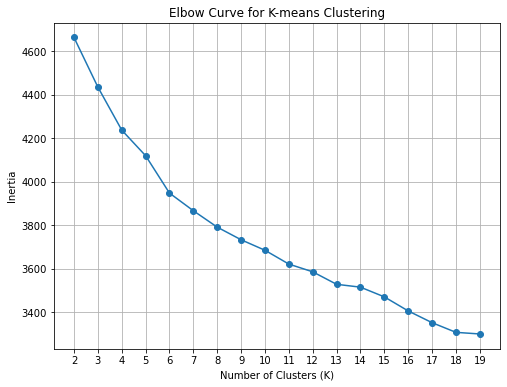

In [33]:
# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()

In [34]:
# Flatten the lists in the 'text2vec' column to create a 2D array of numerical features
X = np.array([vec for vec_list in cocktails['text2vec'] for vec in vec_list])

# Reshape X to a 2D array with the same number of columns as the original lists
X = X.reshape(-1, len(cocktails['text2vec'][0]))

cluster_df = pd.DataFrame(X)

pca_cluster_df = pd.DataFrame(X)

# Apply K-means clustering
num_clusters = 10  # Set the number of clusters you want to generate
kmeans = KMeans(n_clusters=num_clusters)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_df)

# Display the modified DataFrame with cluster assignments
cluster_df.groupby("Cluster")["Cluster"].count()

Cluster
0     64
1    126
2      3
3     47
4    107
5     14
6    145
7      5
8    143
9     32
Name: Cluster, dtype: int64

In [35]:
cocktails['cluster'] = cluster_df['Cluster']

In [36]:
cocktails.head()

Cocktail Name          Bartender      Bar/Company  \
0             Flor de Amaras     Kelly McCarthy              NaN   
1            The Happy Place  Elizabeth Montana  Forgery & Verso   
2     Bon Voyage Pisco Punch        Jon Morales              NaN   
3  Still Life of a Pineapple    Daniel Braganca          Backbar   
4        The Bittered Valley         Nik Virrey              NaN   

        Location                                        Ingredients  \
0         Boston  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  San Francisco  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  San Francisco  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3     Somerville  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4        Seattle  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                     Garnish   Glassware  \
0                            Marigold Petals         NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary         NaN   
2                                        NaN  Punch Bowl   
3                                        NaN         NaN   
4                                        NaN         NaN   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   

                                              Notes  \
0                                               NaN   
1  Junipero Gin 20th Anniversary Signature Cocktail   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                    Ingredients_list  \
0  [1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, ....   
1  [2 oz Junipero Gin, .75 oz House-made Cranberr...   
2  [1500 ml BarSol Selecto Italia Pisco, 750 ml L...   
3  [1.5 oz BarSol Primero Quebranta Pisco, .75 oz...   
4  [1.25 oz Luxardo Maraschino Liqueur, 4 drops A...   

                                        alcohol_type  \
0                                           [mezcal]   
1                                       [gin, blanc]   
2                                            [pisco]   
3                                  [pisco, vermouth]   
4  [liqueur, luxardo, pisco, amaro, luxardo, fern...   

                                           full_text  \
0  Kelly McCarthy Boston  oz Mezcal, oz Hibiscus ...   
1  Elizabeth Montana Forgery & Verso San Francisc...   
2  Jon Morales San Francisco ml BarSol Selecto It...   
3  Daniel Braganca Backbar Somerville  oz BarSol ...   
4  Nik Virrey Seattle  oz Luxardo Maraschino Liqu...   

                                            text2vec  cluster  
0  [0.5141744017601013, -0.5332043766975403, -0.3...      0.0  
1  [1.3489447832107544, -0.8644180297851562, -0.2...      3.0  
2  [2.1141445636749268, -0.8587653636932373, -0.9...      3.0  
3  [0.6580911874771118, -0.3517036736011505, -0.0...      1.0  
4  [0.6370353698730469, -0.5778235793113708, 0.14...      1.0

#### Analysis to visualise cluster definitions

In [37]:
# Step 2: Perform PCA
# Choose the number of principal components you want to retain
num_components = 2  # Adjust this based on your requirement

pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(pca_cluster_df)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(num_components)])

pca_df["target"] = cocktails['cluster']

# View the explained variance ratio (optional)
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var_ratio)

Explained Variance Ratio: [0.17041838 0.0920287 ]


In [38]:
set(pca_df["target"])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan}

In [39]:
cluster_colors = {
    '1': 'red',
    '2': 'blue',
    '3': 'green',
    '4': 'purple',
    '5': 'orange',
    '6': 'pink',
    '7': 'brown',
    '8': 'gray',
    '9': 'cyan',
    '0': 'magenta',
}

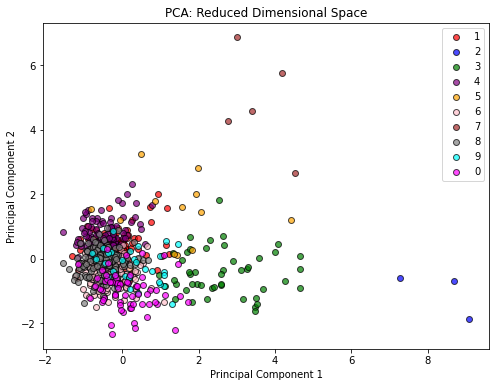

In [40]:
# Visualize the data in the reduced PCA space with distinct colors for each cluster
plt.figure(figsize=(8, 6))
for cluster, color in cluster_colors.items():
    cluster_data = pca_df[pca_df['target'] == int(cluster)]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], c=color, label=cluster, edgecolors='k', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Reduced Dimensional Space')
plt.legend()
plt.show()

In [41]:
cluster_df.head()

0         1         2         3         4         5         6  \
0  0.514174 -0.533204 -0.384633  0.318892 -0.100277 -0.240392  0.069081   
1  1.348945 -0.864418 -0.281395  0.268500 -0.083381 -0.542154  0.213826   
2  2.114145 -0.858765 -0.946565  1.225811 -0.228934 -0.436556 -1.320073   
3  0.658091 -0.351704 -0.072403  0.491716  0.252386 -0.351500  0.190872   
4  0.637035 -0.577824  0.141527  0.637145 -0.196525 -0.249902 -0.096465   

          7         8         9        10        11        12        13  \
0  0.160981 -0.420006 -0.112870  0.223884  0.022085 -0.040001 -0.732593   
1  0.175465 -0.470654 -0.192634 -0.491021 -0.001878  0.002993 -0.868607   
2  0.391598 -0.430992 -2.254327 -1.232025 -0.305605 -1.078846 -2.032027   
3  0.423329 -0.876373  0.044740  0.253781 -0.305176 -0.331933 -0.952690   
4 -0.171357 -1.171214  0.521031  0.463181 -0.021883 -0.236623 -0.807969   

         14        15        16        17        18        19        20  \
0 -0.417047  0.768412 -0.261491  0.198511 -0.709747  0.725764  0.525417   
1  0.140108  0.717465  0.296673 -0.669490 -0.788190  0.331823  0.662148   
2 -0.739554  0.413530 -0.206407 -0.594486 -1.577762  1.288454  1.767880   
3 -0.224339  0.781405  0.116355 -0.255277 -0.396923  0.521775  0.432816   
4 -0.169811  1.034739  0.423809 -0.155809 -0.222412  1.138304  0.615789   

         21        22        23        24        25        26        27  \
0  0.375827  1.032471 -0.646569 -0.142836 -0.072345 -0.310228 -0.239611   
1  0.534464  1.351584 -0.968567 -0.782283  0.779114  0.451002 -0.104390   
2  0.161666  1.566376 -1.410603  0.371861 -0.419186  0.402626 -1.348139   
3  0.518605  0.469432 -0.583367 -0.375209  0.230421 -0.049627 -0.217612   
4  1.030848  0.252255 -0.539931 -0.181193  0.467866 -0.254119  0.220043   

         28        29        30        31        32        33        34  \
0  0.024971 -0.236377  0.114074  0.172798 -0.132820 -0.152600 -0.014586   
1 -0.145875  0.332673  0.645068  0.109334  0.179799  0.453644 -1.281696   
2 -0.338850  1.732730 -0.333856  1.098619 -0.060044  0.489661 -0.149739   
3 -0.015099  0.325151  0.397429  0.001039 -0.307175 -0.004053 -0.766331   
4 -0.096387 -0.464269  0.112498  0.196145 -0.475080 -0.849343  0.039691   

         35        36        37        38        39        40        41  \
0  0.144410  0.041425  0.322861  0.475962  0.222950 -0.349280 -0.474515   
1  0.369637  0.801043  0.247148 -0.333984 -0.799576 -0.290783 -0.686126   
2  1.327557  0.656122  1.273477 -0.952851 -0.533781  0.055788 -0.763438   
3  0.152950  0.131365  0.048313  0.220427 -0.209486 -0.014766 -0.512591   
4  0.331297 -0.308129  0.035185  0.544309 -0.213774 -0.317350 -0.665639   

         42        43        44        45        46        47        48  \
0  0.408889 -0.044771 -0.161800  0.186105 -0.364351 -0.534420 -0.411604   
1 -0.158757 -0.432915  0.592936 -0.627661  0.108868  0.267447  0.647895   
2  1.785481 -0.230220  1.399478  0.063947 -0.770153 -0.509956 -0.646932   
3  0.449097 -0.248848  0.086236 -0.049846 -0.020889 -0.520514  0.195423   
4  0.348402 -0.285284  0.214260  0.501319  0.033407 -0.417290  0.010200   

         49        50        51        52        53        54        55  \
0  0.047789 -0.116056  0.092731 -0.040290  0.274324  0.620890 -0.024984   
1  0.417066 -0.303132  0.215723 -0.009132  0.226437 -0.340907  0.025793   
2 -1.052923  0.555752 -0.972308  0.575104  0.777408  0.643419 -0.874538   
3  0.119896  0.287633  0.224792  0.410487 -0.016213  0.229360 -0.019700   
4  0.512060  0.149691  0.875113  0.716258 -0.712783  0.787679  0.501908   

         56        57        58        59        60        61        62  \
0  0.384392 -0.521573 -0.479939 -0.027821 -0.146207 -0.223604 -0.173354   
1  0.666124 -0.422734 -0.579058 -0.507206 -0.357971  0.198458 -0.588207   
2  0.604636 -0.278418 -2.703333 -0.055042  0.096161 -1.225299  0.655509   
3  0.541520 -0.586569 -0.718318 -0.063810 -0.036583 -0.393721 -0.159681   
4  0.248231 -0.313984  0.21

In [42]:
X = pca_cluster_df
y = cluster_df.Cluster
n_samples, n_features = X.shape
classes = np.unique(y)
n_classes = len(classes)
n_components = 2
max_components = min(n_classes-1,n_features)
print("Number of classes: {}".format(n_classes))
print("Number of features: {}".format(n_features))
if n_components > max_components:
    raise ValueError("the number of components cannot be larger than min(n_features,n_classes-1)")

Number of classes: 10
Number of features: 64


In [43]:
mean = np.mean(X,axis=0)
Sw = np.zeros((n_features,n_features))
Sb = np.zeros((n_features,n_features))
for c in classes:
    Xc = X[y==c]
    class_means = np.mean(Xc,axis=0)
    #within-class variance
    Sw += (Xc-class_means).T.dot(Xc-class_means)
    mean_diff = (class_means-mean).values.reshape(n_features,1)
    #between-class variance
    Sb += n_classes * (mean_diff).dot(mean_diff.T)

In [44]:
A = np.linalg.inv(Sw).dot(Sb)
eigen_values, eigen_vectors = np.linalg.eig(A) 
eigen_vectors = eigen_vectors.T

In [45]:
sorted_idxs = np.argsort(abs(eigen_values))[::-1] 
eigen_values,eigen_vectors = eigen_values[sorted_idxs],eigen_vectors[sorted_idxs]
linear_discriminants = eigen_vectors[0:n_components]

In [46]:
explained_variance_ratio = np.sort(eigen_values / np.sum(eigen_values))[::-1][:max_components]
print(explained_variance_ratio)

[0.61168089+6.33553818e-32j 0.27425327+2.84060219e-32j
 0.04631104+4.79670621e-33j 0.03083445+3.19370505e-33j
 0.0186209 +1.92867546e-33j 0.01075249+1.11369817e-33j
 0.00390536+4.04501292e-34j 0.00226764+2.34872465e-34j
 0.00137397+1.42310390e-34j]


In [47]:
X_lda = np.dot(X,linear_discriminants.T)
X_lda_df = pd.DataFrame({'LDA_1':X_lda[:,0],'LDA_2':X_lda[:,1]})
X_lda_df['target'] = y
X_lda_df['target'] = X_lda_df['target'].apply(lambda y: str(y))

In [48]:
# Define a function to convert complex numbers to floats
def convert_to_float(complex_str):
    if isinstance(complex_str, str) and complex_str.endswith('j'):
        return float(complex_str[:-1])
    else:
        return complex_str

# Apply the conversion function to the DataFrame column
X_lda_df['LDA_1'] = X_lda_df['LDA_1'].astype(np.float64)

X_lda_df['LDA_2'] = X_lda_df['LDA_2'].astype(np.float64)

C:\Users\Vaishali\anaconda3\lib\site-packages\pandas\core\dtypes\astype.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [49]:
X_lda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LDA_1   686 non-null    float64
 1   LDA_2   686 non-null    float64
 2   target  686 non-null    object 
dtypes: float64(2), object(1)
memory usage: 16.2+ KB


In [50]:
X_lda_df.head()

LDA_1     LDA_2 target
0 -0.245515  0.081861      0
1 -0.178321  0.324121      3
2 -0.877932  0.454914      3
3 -0.182883  0.198417      1
4  0.063018  0.229224      1

In [51]:
fig = px.scatter(X_lda_df, x='LDA_1', y='LDA_2', color=X_lda_df.target,labels={'0': 'LDA 1', '1': 'LDA 2'})
fig.show()

In [52]:
cocktails.head()

Cocktail Name          Bartender      Bar/Company  \
0             Flor de Amaras     Kelly McCarthy              NaN   
1            The Happy Place  Elizabeth Montana  Forgery & Verso   
2     Bon Voyage Pisco Punch        Jon Morales              NaN   
3  Still Life of a Pineapple    Daniel Braganca          Backbar   
4        The Bittered Valley         Nik Virrey              NaN   

        Location                                        Ingredients  \
0         Boston  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  San Francisco  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  San Francisco  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3     Somerville  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4        Seattle  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                     Garnish   Glassware  \
0                            Marigold Petals         NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary         NaN   
2                                        NaN  Punch Bowl   
3                                        NaN         NaN   
4                                        NaN         NaN   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   

                                              Notes  \
0                                               NaN   
1  Junipero Gin 20th Anniversary Signature Cocktail   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                    Ingredients_list  \
0  [1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, ....   
1  [2 oz Junipero Gin, .75 oz House-made Cranberr...   
2  [1500 ml BarSol Selecto Italia Pisco, 750 ml L...   
3  [1.5 oz BarSol Primero Quebranta Pisco, .75 oz...   
4  [1.25 oz Luxardo Maraschino Liqueur, 4 drops A...   

                                        alcohol_type  \
0                                           [mezcal]   
1                                       [gin, blanc]   
2                                            [pisco]   
3                                  [pisco, vermouth]   
4  [liqueur, luxardo, pisco, amaro, luxardo, fern...   

                                           full_text  \
0  Kelly McCarthy Boston  oz Mezcal, oz Hibiscus ...   
1  Elizabeth Montana Forgery & Verso San Francisc...   
2  Jon Morales San Francisco ml BarSol Selecto It...   
3  Daniel Braganca Backbar Somerville  oz BarSol ...   
4  Nik Virrey Seattle  oz Luxardo Maraschino Liqu...   

                                            text2vec  cluster  
0  [0.5141744017601013, -0.5332043766975403, -0.3...      0.0  
1  [1.3489447832107544, -0.8644180297851562, -0.2...      3.0  
2  [2.1141445636749268, -0.8587653636932373, -0.9...      3.0  
3  [0.6580911874771118, -0.3517036736011505, -0.0...      1.0  
4  [0.6370353698730469, -0.5778235793113708, 0.14...      1.0

#### Build Word Clouds to Define Cluster

In [53]:
# Split the column into subsets
unique_clusters = [x for x in set(pca_df["target"]) if str(x) != 'nan']

cluster_text = []

# Loop through the subsets and generate word collections
for cluster in unique_clusters:
    subset_text_data = " ".join(cocktails[cocktails['cluster'] == cluster]['full_text'].astype(str))
    
    cluster_text.append(subset_text_data)

In [54]:
unique_clusters

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [55]:
cluster_words_df = pd.DataFrame()
cluster_words_df["cluster"] = unique_clusters
cluster_words_df["word_collection"] = cluster_text

In [56]:
cluster_words_df

cluster                                    word_collection
0      0.0  Kelly McCarthy Boston  oz Mezcal, oz Hibiscus ...
1      1.0  Daniel Braganca Backbar Somerville  oz BarSol ...
2      2.0  Sean McClure oz Karlsson's Gold Vodka (Coffee-...
3      3.0  Elizabeth Montana Forgery & Verso San Francisc...
4      4.0  Naomi Levy Eastern Standard Boston oz Luxardo ...
5      5.0   oz Hirsch Small Batch Reserve Bourbon, ml Ame...
6      6.0   oz King's Ginger Liqueur, oz H by HINE,  oz L...
7      7.0  Sean McClure oz Karlsson's Gold Vodka, oz Apri...
8      8.0  Dale DeGroff  oz Cognac,  oz Cointreau,  oz Lu...
9      9.0   oz King's Ginger Liqueur,  oz Cranberry Juice...

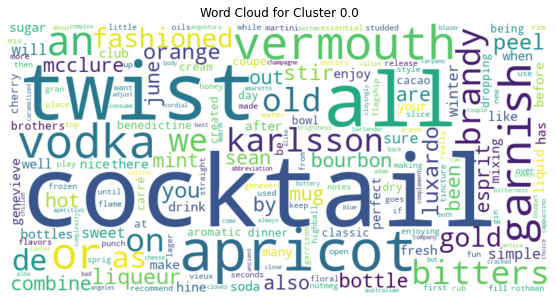

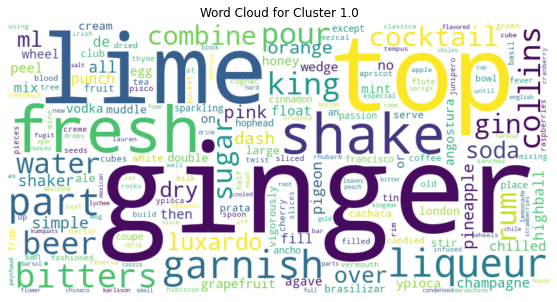

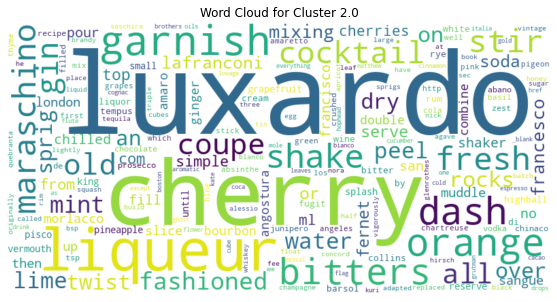

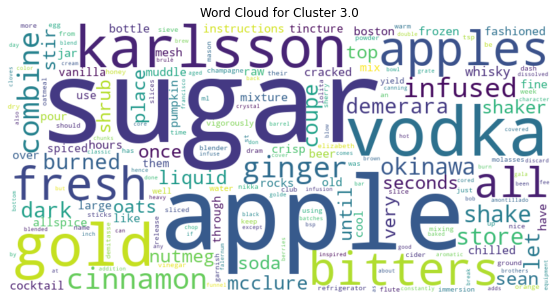

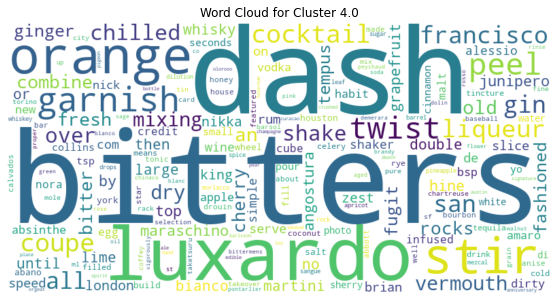

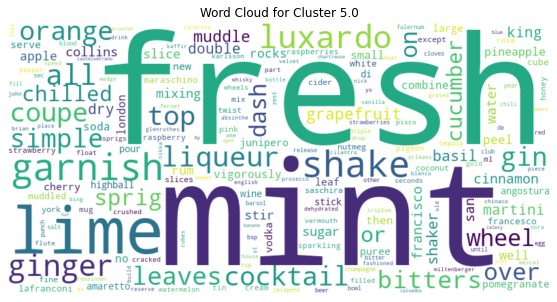

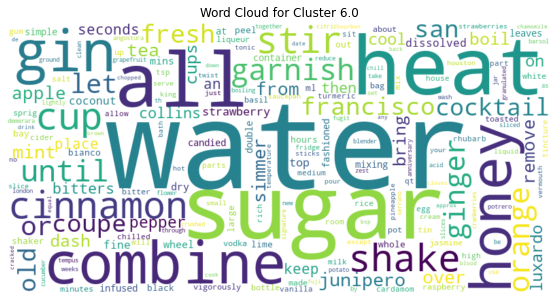

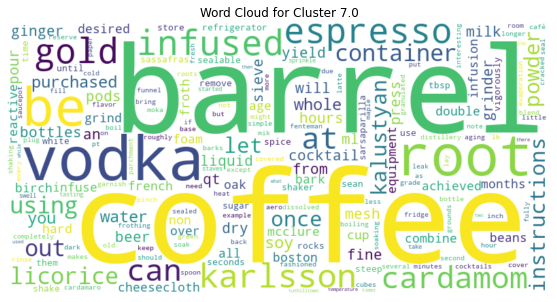

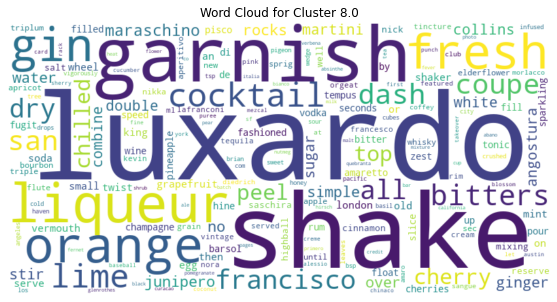

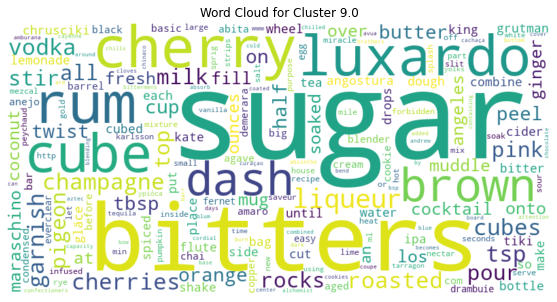

In [66]:
# Define a custom list of stop words to exclude from the TF-IDF calculation
custom_stop_words = ['the', 'and', 'in', 'of', 'a', 'to', 'is', 'it', 'that', \
                     'this', 'oz', 'glass', 'add', 'lemon', 'ice', 'with', \
                    'into', 'juice', 'syrup', 'strain', 'for', 'ingredients'] 

# Step 1: Combine all words into a single document representing the full collection
full_collection_text = " ".join(cluster_words_df['word_collection'])

# Step 2: Calculate TF-IDF scores for the full collection
tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform([full_collection_text])

# Step 3: Loop through each row of the DataFrame and generate word clouds using TF-IDF scores
for index, row in cluster_words_df.iterrows():
    word_collection_text = row['word_collection']

    # Step 4: Calculate TF-IDF scores for the current row's word_collection based on the full collection
    tfidf_matrix_row = tfidf_vectorizer.transform([word_collection_text])
    tfidf_scores = tfidf_matrix_row.sum(axis=0).A1

    # Step 5: Create a dictionary to map words to their TF-IDF scores
    words_tfidf = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_scores))

    # Step 6: Generate the word cloud for the current row's word_collection with TF-IDF highlighting
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_tfidf)

    # Step 7: Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {row['cluster']}")
    plt.axis("off")
    plt.show()

In [57]:
cocktails[cocktails['cluster'] == 7]

Cocktail Name       Bartender Bar/Company     Location  \
115            Swedish Royal    Sean McClure         NaN          NaN   
153             Nieux Carr??    Sean McClure         NaN          NaN   
154           L.E.S. Is More    Sean McClure         NaN          NaN   
232  Hotaling Seaside Shandy  Jeff Hollinger         NaN          NaN   
626              Pink Mojito    Kate Grutman         NaN  Los Angeles   

                                           Ingredients      Garnish  \
115  2 oz Karlsson's Gold Vodka, 1 oz Apricot brand...          NaN   
153  1.5 oz Karlsson's Gold Vodka, .75 oz Gran Duqu...  Lemon twist   
154  1.5 oz Karlsson's Gold Vodka, .75 oz Esprit de...  Lemon Twist   
232                 1 oz Genevieve Gin, 1 bottle Lager          NaN   
626  2 oz Pink Pigeon Rum, .25 oz Simple syrup, 2 o...   Mint sprig   

               Glassware                                        Preparation  \
115                Coupe  Combine all ingredients in a frozen mixing gla...   
153  Old Fashioned Glass  Combine all liquid ingredients in a chilled mi...   
154       Highball Glass  Combine all liquid ingredients in a highball o...   
232                  NaN  Genevieve is Hotaling's interpretation of gene...   
626                  NaN  To make simple syrup, mix equal parts hot wate...   

                                                 Notes  \
115  Vermouth: Vermouth, like wine goes bad if it h...   
153  This cocktail is a spin on a classic cocktail ...   
154  This is a perfect spring or summer cocktail. T...   
232                                                NaN   
626                                                NaN   

                                      Ingredients_list  \
115  [2 oz Karlsson's Gold Vodka, 1 oz Apricot bran...   
153  [1.5 oz Karlsson's Gold Vodka, .75 oz Gran Duq...   
154  [1.5 oz Karlsson's Gold Vodka, .75 oz Esprit d...   
232               [1 oz Genevieve Gin, 1 bottle Lager]   
626  [2 oz Pink Pigeon Rum, .25 oz Simple syrup, 2 ...   

                            alcohol_type  \
115  [vodka, brandy, vermouth, vermouth]   
153            [vodka, brandy, vermouth]   
154                              [vodka]   
232                                [gin]   
626                                [rum]   

                                             full_text  \
115  Sean McClure oz Karlsson's Gold Vodka, oz Apri...   
153  Sean McClure  oz Karlsson's Gold Vodka,  oz Gr...   
154  Sean McClure  oz Karlsson's Gold Vodka,  oz Es...   
232  Jeff Hollinger oz Genevieve Gin, bottle Lager ...   
626  Kate Grutman Los Angeles oz Pink Pigeon Rum,  ...   

                                              text2vec  cluster  
115  [-0.558038055896759, -2.856119155883789, -1.19...      7.0  
153  [1.0015777349472046, -1.810745358467102, -0.05...      7.0  
154  [1.067347764968872, -1.0018285512924194, 0.260...      7.0  
232  [0.5122005343437195, -1.870195984840393, -0.99...      7.0  
626  [0.46493443846702576, -0.8247464895248413, 0.0...      7.0

In [84]:
# cocktails["Preparation"][232]

In [85]:
# cocktails["Preparation"][627]

In [86]:
# cocktails["Preparation"][154]

In [87]:
# cocktails["Preparation"][153]

In [58]:
# Split the column into subsets
unique_clusters = [x for x in set(pca_df["target"]) if str(x) != 'nan']

cluster_alcohol = []

# Loop through the subsets and generate word collections
for cluster in unique_clusters:
    subset_text_data = " ".join(cocktails[cocktails['cluster'] == cluster]['alcohol_type'].astype(str))
    
    cluster_alcohol.append(subset_text_data)

In [59]:
cluster_alcohol_df = pd.DataFrame()
cluster_alcohol_df["cluster"] = unique_clusters
cluster_alcohol_df["alcohol_list"] = cluster_alcohol

In [151]:
# Define a custom list of stop words to exclude from the TF-IDF calculation
custom_stop_words = ['the', 'and', 'in', 'of', 'a', 'to', 'is', 'it', 'that', \
                     'this', 'oz', 'glass', 'add', 'lemon', 'ice', 'with', \
                    'into', 'juice', 'syrup', 'strain', 'for', 'ingredients'] 

# Step 1: Combine all words into a single document representing the full collection
full_collection_text = " ".join(cluster_alcohol_df['alcohol_list'])

# Step 2: Calculate TF-IDF scores for the full collection
tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform([full_collection_text])

# Step 3: Loop through each row of the DataFrame and generate word clouds using TF-IDF scores
for index, row in cluster_alcohol_df.iterrows():
    word_collection_text = row['alcohol_list']

    # Step 4: Calculate TF-IDF scores for the current row's word_collection based on the full collection
    tfidf_matrix_row = tfidf_vectorizer.transform([word_collection_text])
    tfidf_scores = tfidf_matrix_row.sum(axis=0).A1

    # Step 5: Create a dictionary to map words to their TF-IDF scores
    words_tfidf = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_scores))

    # Step 6: Generate the word cloud for the current row's word_collection with TF-IDF highlighting
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_tfidf)

    # Step 7: Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {row['cluster']}")
    plt.axis("off")
    plt.show()

ValueError: Only supported for TrueType fonts

In [60]:
# Manual Coctail Alcohol naming

cocktail_alcohol_dict = {
    0.0: 'Gin Liqueur',
    1.0: 'Luxardo Gin',
    2.0: 'Vermounth Vodka',
    3.0: 'Liqueur Luxardo',
    4.0: 'Gin Bianco',
    5.0: 'Luxardo Liqueur',
    6.0: 'Vodka Whisky',
    7.0: 'Liqueur Gin Luxardo',
    8.0: 'Vodka Beer',
    9.0: 'Gin Liqueur Cachaca'
}

In [61]:
# Manual Coctail Genre naming

cocktail_genre_dict = {
    0: 'Ginger Fresh',
    1: 'Bitters Garnish',
    2: 'Vermounth Twish',
    3: 'Dash Luxardo',
    4: 'Water cinnamon',
    5: 'Luxardo Bitters',
    6: 'Sugar Apple',
    7: 'Shake Luxardo',
    8: 'Coffee Barrel',
    9: 'Lime Ginger'
}

In [62]:
cocktails['alcohol_genre'] = cocktails['cluster'].map(cocktail_alcohol_dict)
cocktails['cocktail_genre'] = cocktails['cluster'].map(cocktail_genre_dict)

In [63]:
cocktails.head()

Cocktail Name          Bartender      Bar/Company  \
0             Flor de Amaras     Kelly McCarthy              NaN   
1            The Happy Place  Elizabeth Montana  Forgery & Verso   
2     Bon Voyage Pisco Punch        Jon Morales              NaN   
3  Still Life of a Pineapple    Daniel Braganca          Backbar   
4        The Bittered Valley         Nik Virrey              NaN   

        Location                                        Ingredients  \
0         Boston  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  San Francisco  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  San Francisco  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3     Somerville  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4        Seattle  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                     Garnish   Glassware  \
0                            Marigold Petals         NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary         NaN   
2                                        NaN  Punch Bowl   
3                                        NaN         NaN   
4                                        NaN         NaN   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   

                                              Notes  \
0                                               NaN   
1  Junipero Gin 20th Anniversary Signature Cocktail   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                    Ingredients_list  \
0  [1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, ....   
1  [2 oz Junipero Gin, .75 oz House-made Cranberr...   
2  [1500 ml BarSol Selecto Italia Pisco, 750 ml L...   
3  [1.5 oz BarSol Primero Quebranta Pisco, .75 oz...   
4  [1.25 oz Luxardo Maraschino Liqueur, 4 drops A...   

                                        alcohol_type  \
0                                           [mezcal]   
1                                       [gin, blanc]   
2                                            [pisco]   
3                                  [pisco, vermouth]   
4  [liqueur, luxardo, pisco, amaro, luxardo, fern...   

                                           full_text  \
0  Kelly McCarthy Boston  oz Mezcal, oz Hibiscus ...   
1  Elizabeth Montana Forgery & Verso San Francisc...   
2  Jon Morales San Francisco ml BarSol Selecto It...   
3  Daniel Braganca Backbar Somerville  oz BarSol ...   
4  Nik Virrey Seattle  oz Luxardo Maraschino Liqu...   

                                            text2vec  cluster  \
0  [0.5141744017601013, -0.5332043766975403, -0.3...      0.0   
1  [1.3489447832107544, -0.8644180297851562, -0.2...      3.0   
2  [2.1141445636749268, -0.8587653636932373, -0.9...      3.0   
3  [0.6580911874771118, -0.3517036736011505, -0.0...      1.0   
4  [0.6370353698730469, -0.5778235793113708, 0.14...      1.0   

     alcohol_genre   cocktail_genre  
0      Gin Liqueur     Ginger Fresh  
1  Liqueur Luxardo     Dash Luxardo  
2  Liqueur Luxardo     Dash Luxardo  
3      Luxardo Gin  Bitters Garnish  
4      Luxardo Gin  Bitters Garnish

In [64]:
# Calculate cosine similarity between vectors in jd_raw_data_df and resume_data_df
similarity_scores = cosine_similarity(cocktails['text2vec'].tolist(), cocktails['text2vec'].tolist())

# Create a new column in jd_raw_data_df with reference to top 5 cosine similarity scores
top_5_scores = similarity_scores.argsort()[:, -6:][:, ::-1]  # Get the indices of top 5 scores for each row

# Create a new column to store the top 5 similarity scores
cocktails['top_5_similarity_scores'] = [[similarity_scores[row][index] for index in indices] for row, indices in enumerate(top_5_scores)]

# Create a new column to store the corresponding row indices in resume_data_df
cocktails['top_5_similar_cocktails'] = [cocktails.index[index_list].tolist() for index_list in top_5_scores]


In [65]:
# Apply lambda function to remove index number from the list
cocktails['top_5_similar_cocktails'] = cocktails.apply(lambda row: [cocktail for cocktail in row['top_5_similar_cocktails'] if cocktail != row.name], axis=1)

In [66]:
# Function to get names from index numbers
def get_similar_cocktails_names(row):
    return [cocktails.loc[index, 'Cocktail Name'] for index in row['top_5_similar_cocktails']]

# Apply the function to create the new column
cocktails['similar_cocktails_names'] = cocktails.apply(get_similar_cocktails_names, axis=1)

In [67]:
cocktails.head(10)

Cocktail Name          Bartender  \
0                        Flor de Amaras     Kelly McCarthy   
1                       The Happy Place  Elizabeth Montana   
2                Bon Voyage Pisco Punch        Jon Morales   
3             Still Life of a Pineapple    Daniel Braganca   
4                   The Bittered Valley         Nik Virrey   
5                              OH Snap!     Kevin Diedrich   
6                    Wabash Avenue Sour   Phillip Ricafort   
7                              IPA Mule           Jon Ruiz   
8                         Ritz Cocktail       Dale DeGroff   
9  King's Snap the Chocolate Out of You         Ian Julian   

              Bar/Company       Location  \
0                     NaN         Boston   
1         Forgery & Verso  San Francisco   
2                     NaN  San Francisco   
3                 Backbar     Somerville   
4                     NaN        Seattle   
5  Pacific Cocktail Haven  San Francisco   
6            American Oak        Alameda   
7         AMK Kitchen Bar        Chicago   
8                     NaN            NaN   
9                     NaN    New Orleans   

                                         Ingredients  \
0  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   
5  1 oz Junipero Gin, 1 oz House-made Simple Syru...   
6  2 oz Bourbon, 1 oz Fresh Lemon Juice, .5 oz Lu...   
7  1.5 oz Hophead Vodka, .5 oz Ginger Liqueur, .7...   
8  .75 oz Cognac, .5 oz Cointreau, .25 oz Luxardo...   
9  1 oz King's Ginger Liqueur, 1.5 oz Homemade mi...   

                                     Garnish    Glassware  \
0                            Marigold Petals          NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary          NaN   
2                                        NaN   Punch Bowl   
3                                        NaN          NaN   
4                                        NaN          NaN   
5                                        NaN      Collins   
6                            Rhubarb Bitters        Coupe   
7                                       Mint      Tin Cup   
8                                Orange Peel      Martini   
9                       Ginger snap crumbles  Rocks Glass   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   
5  Add 6-8 sugar snap peas to cocktail shaker. Li...   
6  Add all ingredients and dry-shake (without ice...   
7  Add all ingredients except beer into shaker ti...   
8  Add all ingredients except the champagne to a ...   
9  Add all ingredients except the whip cream and ...   

                                              Notes  \
0                                               NaN   
1  Junipero Gin 20th Anniversary Signature Cocktail   
2                                               NaN   
3                                               NaN   
4                                               NaN   
5  Junipero Gin 20th Anniversary Signature Cocktail   
6                                               NaN   
7                                               NaN   
8                                               NaN   
9                                               NaN   

                                    Ingredients_list  \
0  [1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, ....   
1  [2 oz Junipero Gin, .75 oz House-made Cranberr...   
2  [1500 ml BarSol Selecto Italia Pisco, 750 ml L...   
3  [1.5 oz BarSol Primero Quebranta Pisco, .75 oz...   
4  [1.25 oz Luxardo Maraschino Liqueur, 4 drops A...   
5  [1 oz J

In [163]:
cocktails.to_csv('C:\\Users\\Vaishali\\Desktop\\Vaishu\\ISB\\Term 3\\CT\\Assignment\\cocktails_final_data.csv')

In [166]:
# Get a list of all unique values from the 'similar_cocktails_names' column
unique_similar_cocktails = cocktails['similar_cocktails_names'].explode().unique().tolist()
len(unique_similar_cocktails)

599

In [167]:
len(cocktails)

686

In [168]:
# Get a list of all unique values from the 'alcohol_type' column
unique_alcohols = cocktails['alcohol_type'].explode().unique().tolist()
len(unique_alcohols)

42

In [169]:
unique_alcohols

['mezcal',
 'gin',
 'blanc',
 'pisco',
 'vermouth',
 'liqueur',
 'luxardo',
 'amaro',
 'fernet',
 'bourbon',
 'vodka',
 'champagne',
 'bianco',
 'rum',
 'h by hine',
 'calvados',
 'malt',
 'amaretto',
 'ale',
 'liquor',
 'briottet',
 'cider',
 'glenrothes',
 'scotch',
 'sake',
 'rouge',
 'tempus fugit',
 'cachaca',
 'whisky',
 'whiskey',
 'rye',
 'beer',
 'wine',
 'montifaud cognac',
 'prosecco',
 'brandy',
 'tequila',
 'cocchi americano',
 'amontillado',
 'cynar',
 nan,
 'tuaca']

In [171]:
cocktails['alcohol_type']

0                                               [mezcal]
1                                           [gin, blanc]
2                                                [pisco]
3                                      [pisco, vermouth]
4      [liqueur, luxardo, pisco, amaro, luxardo, fern...
                             ...                        
682    [bianco, luxardo, ale, vermouth, bianco, tempu...
683                                     [h by hine, rum]
684                              [bianco, luxardo, wine]
685                     [whiskey, rye, liqueur, luxardo]
686                             [liqueur, luxardo, beer]
Name: alcohol_type, Length: 686, dtype: object

In [172]:
unique_alcohols = list(set(item for sublist in cocktails['alcohol_type'] for item in sublist))

In [173]:
unique_alcohols

['cachaca',
 'glenrothes',
 'blanc',
 'tequila',
 'beer',
 'vermouth',
 'amaro',
 'tuaca',
 'gin',
 'rye',
 'cocchi americano',
 'rum',
 'vodka',
 'scotch',
 'whiskey',
 'amontillado',
 'montifaud cognac',
 'bourbon',
 'mezcal',
 'whisky',
 'amaretto',
 'luxardo',
 'cider',
 'champagne',
 'pisco',
 'fernet',
 'brandy',
 'liquor',
 'tempus fugit',
 'calvados',
 'rouge',
 'wine',
 'h by hine',
 'prosecco',
 'cynar',
 'ale',
 'briottet',
 'bianco',
 'malt',
 'sake',
 'liqueur']